<a href="https://colab.research.google.com/github/BobGanti/ColabNotebooks/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install tensorflow

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow
from keras.datasets import mnist


#### Loading MNIST Dataset from Keras with Tensrorflow

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images.shape, train_labels.shape, test_images.shape, test_labels.shape


11490434/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

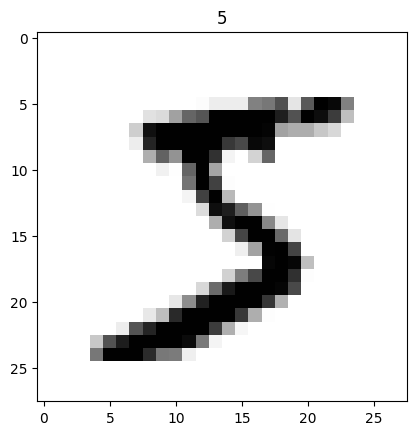

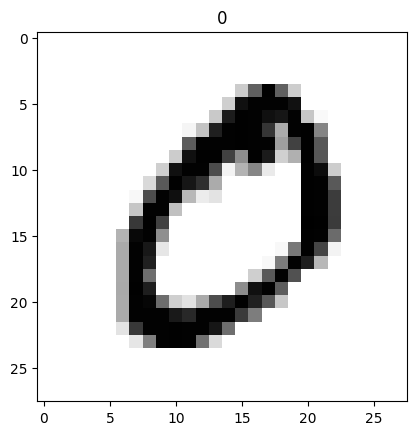

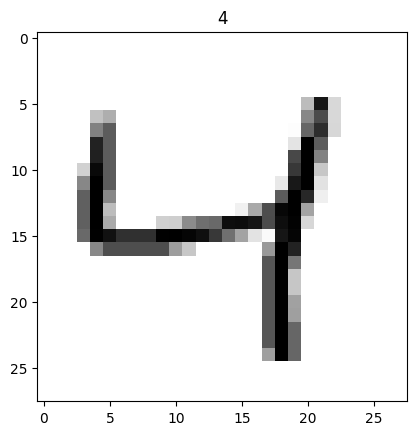

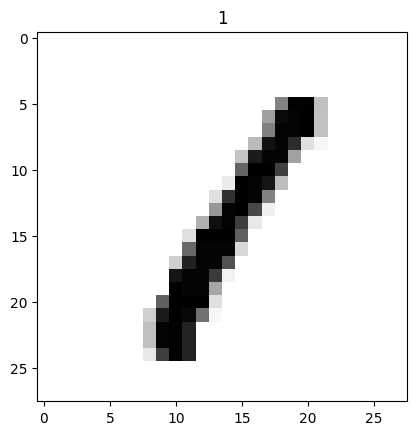

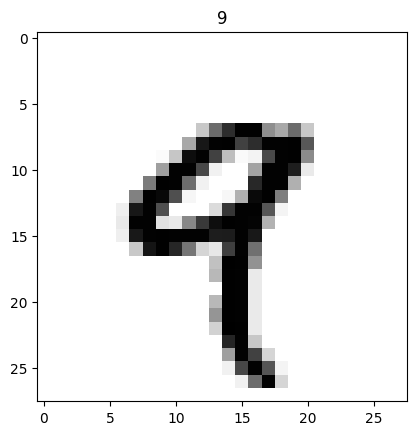

In [4]:
def plot_imput_images(i):
    plt.imshow(train_images[i], cmap='binary')
    plt.title(train_labels[i])
    plt.axis = 'off'
    plt.show()

for i in range(5):
    plot_imput_images(i)


#### Normalise the images

In [5]:
from keras.utils import to_categorical

# Normalising images to a range of 0 to 1 [0, 1] range
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Converting labels to one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print("Data loaded and preprocessed")


Data loaded and preprocessed


#### 1. Basic CNN Architecture

In [26]:

from keras import models, layers

# Basic CNN model 1
basic_model = models.Sequential()
basic_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
basic_model.add(layers.MaxPooling2D((2, 2)))
basic_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
basic_model.add(layers.MaxPooling2D((2, 2)))
basic_model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add dense layers on top
basic_model.add(layers.Flatten())
basic_model.add(layers.Dense(64, activation='relu'))
basic_model.add(layers.Dense(10, activation='softmax'))

 # Summary of the model
basic_model.summary()

basic_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

basic_history = basic_model.fit(
    train_images,
    train_labels,
    epochs=10,
    batch_size=64,
    validation_split=0.2
)

basic_loss, basic_acc = basic_model.evaluate(test_images, test_labels)
print('CNN Accuracy: ', basic_acc)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_29 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_30 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_9 (Flatten)         (None, 576)              

#### 1.4. CNN Visualisation

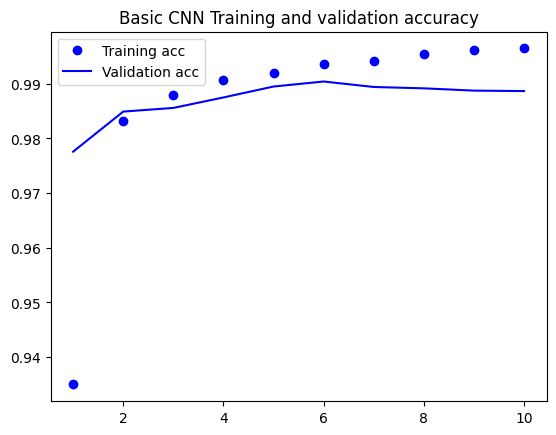

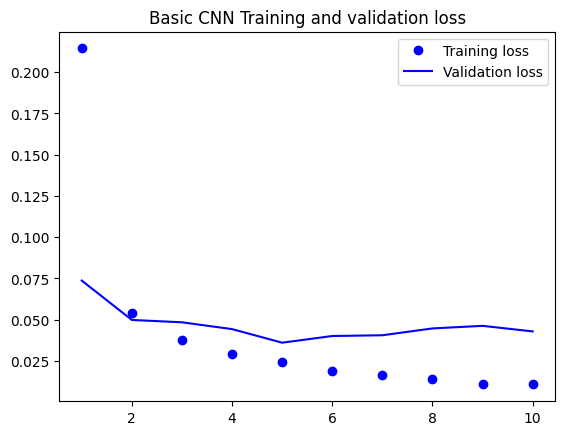

In [28]:
import matplotlib.pyplot as plt

basic_acc = basic_history.history['accuracy']
basic_val_acc = basic_history.history['val_accuracy']
basic_loss = basic_history.history['loss']
basic_val_loss = basic_history.history['val_loss']

epochs = range(1, len(basic_acc) + 1)

plt.plot(epochs, basic_acc, 'bo', label='Training acc')
plt.plot(epochs, basic_val_acc, 'b', label='Validation acc')
plt.title('Basic CNN Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, basic_loss, 'bo', label='Training loss')
plt.plot(epochs, basic_val_loss, 'b', label='Validation loss')
plt.title('Basic CNN Training and validation loss')
plt.legend()

plt.show()


#### 2. LeNet-5 Model

In [29]:

lenet_model = models.Sequential([
    layers.Conv2D(6, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.AveragePooling2D(),
    layers.Conv2D(16, kernel_size=(3, 3), activation='relu'),
    layers.AveragePooling2D(),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Summary of the model
lenet_model.summary()

lenet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

lenet_history = lenet_model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)


lenet_loss, lenet_acc = lenet_model.evaluate(test_images, test_labels)
print('AlexNet Accuracy: ', lenet_acc)



Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 26, 26, 6)         60        
                                                                 
 average_pooling2d_2 (Avera  (None, 13, 13, 6)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_32 (Conv2D)          (None, 11, 11, 16)        880       
                                                                 
 average_pooling2d_3 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten_10 (Flatten)        (None, 400)               0         
                                                                 
 dense_22 (Dense)            (None, 120)             

#### 2.1. LeNet-5 Visualisation

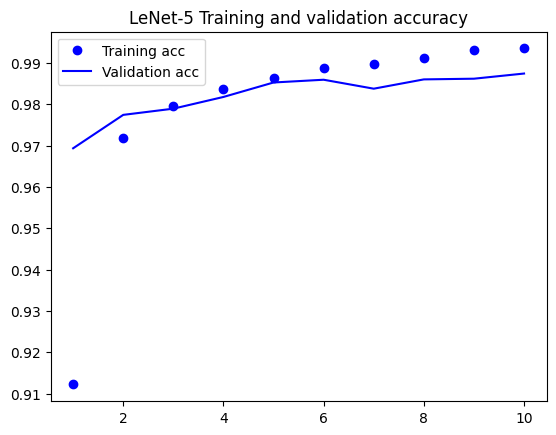

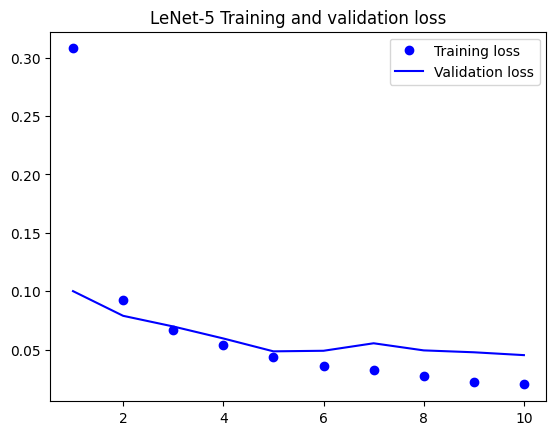

In [30]:
lenet_acc = lenet_history.history['accuracy']
lenet_val_acc = lenet_history.history['val_accuracy']
lenet_loss = lenet_history.history['loss']
lenet_val_loss = lenet_history.history['val_loss']

epochs = range(1, len(lenet_acc) + 1)

plt.plot(epochs, lenet_acc, 'bo', label='Training acc')
plt.plot(epochs, lenet_val_acc, 'b', label='Validation acc')
plt.title('LeNet-5 Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, lenet_loss, 'bo', label='Training loss')
plt.plot(epochs, lenet_val_loss, 'b', label='Validation loss')
plt.title('LeNet-5 Training and validation loss')
plt.legend()

plt.show()

#### 3. AlexNet-inspired Model

In [31]:
from keras import models, layers

# Model architecture (more suitable for smaller input size)
alexnet_model = models.Sequential([
    layers.Conv2D(48, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(192, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.Conv2D(192, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compiling
alexnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary to check the architecture
alexnet_model.summary()

# Train the model
alexnet_history = alexnet_model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model
alexnet_loss, alexnet_acc = alexnet_model.evaluate(test_images, test_labels)
print(f"AlexNet accuracy: {alexnet_acc}")



Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 26, 26, 48)        480       
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 13, 13, 48)        0         
 ng2D)                                                           
                                                                 
 conv2d_34 (Conv2D)          (None, 13, 13, 128)       55424     
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 6, 6, 128)         0         
 ng2D)                                                           
                                                                 
 conv2d_35 (Conv2D)          (None, 6, 6, 192)         221376    
                                                                 
 conv2d_36 (Conv2D)          (None, 6, 6, 192)       

#### 3.3. AlexNet Visualisation

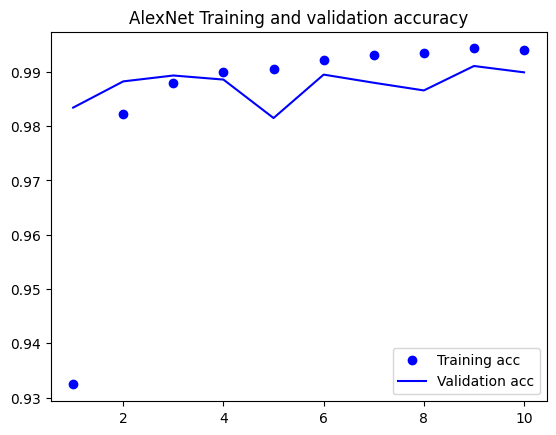

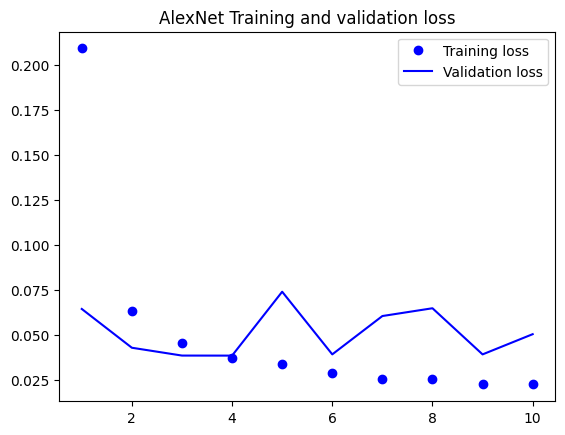

In [32]:
alexnet_acc = alexnet_history.history['accuracy']
alexnet_val_acc = alexnet_history.history['val_accuracy']
alexnet_loss = alexnet_history.history['loss']
alexnet_val_loss = alexnet_history.history['val_loss']

epochs = range(1, len(alexnet_acc) + 1)

plt.plot(epochs, alexnet_acc, 'bo', label='Training acc')
plt.plot(epochs, alexnet_val_acc, 'b', label='Validation acc')
plt.title('AlexNet Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, alexnet_loss, 'bo', label='Training loss')
plt.plot(epochs, alexnet_val_loss, 'b', label='Validation loss')
plt.title('AlexNet Training and validation loss')
plt.legend()

plt.show()

#### 4. Custom CNN

In [33]:
custom_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(10, activation='softmax')
])
custom_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary to check the architecture
custom_model.summary()

# Train the model
custom_history = custom_model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model
custom_loss, custom_acc = custom_model.evaluate(test_images, test_labels)
print(f"Custom CNN accuracy: {custom_acc}")



Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_12 (Ba  (None, 26, 26, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_39 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_13 (Ba  (None, 24, 24, 64)        256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 12, 12, 64)        0         
 ng2D)                                                           
                                                     

#### Custom Model Visualisation

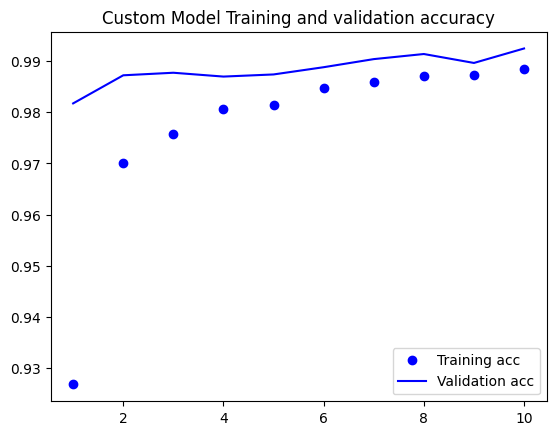

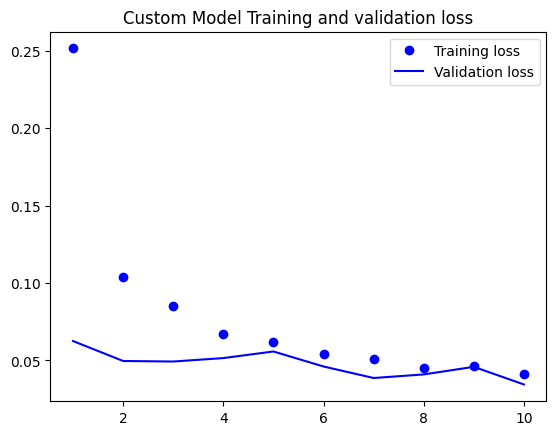

In [34]:
custom_acc = custom_history.history['accuracy']
custom_val_acc = custom_history.history['val_accuracy']
custom_loss = custom_history.history['loss']
custom_val_loss = custom_history.history['val_loss']

epochs = range(1, len(custom_acc) + 1)

plt.plot(epochs, custom_acc, 'bo', label='Training acc')
plt.plot(epochs, custom_val_acc, 'b', label='Validation acc')
plt.title('Custom Model Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, custom_loss, 'bo', label='Training loss')
plt.plot(epochs, custom_val_loss, 'b', label='Validation loss')
plt.title('Custom Model Training and validation loss')
plt.legend()

plt.show()

#### Comparing Accuracies

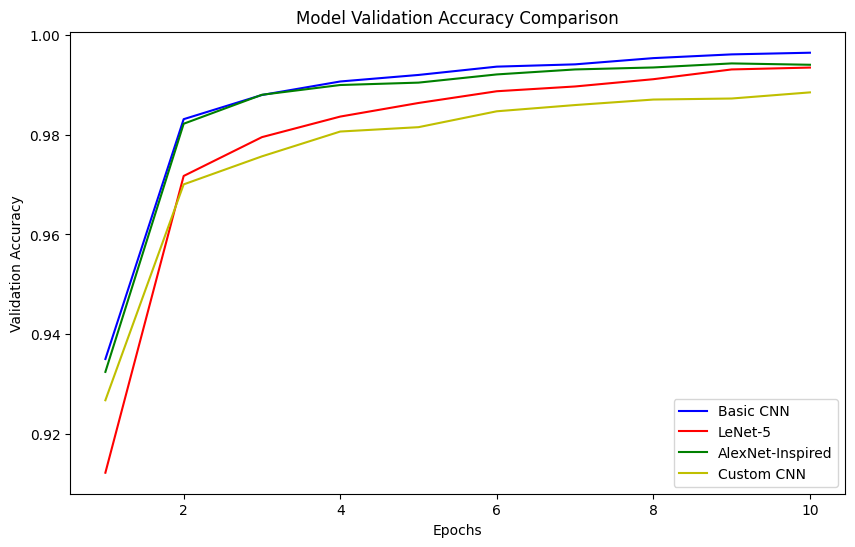

In [35]:
import matplotlib.pyplot as plt

# Number of epochs (assuming all models trained for the same number of epochs)
epochs = range(1, len(basic_acc) + 1)

# Plot validation accuracies
plt.figure(figsize=(10, 6))
plt.plot(epochs, basic_acc, 'b-', label='Basic CNN')
plt.plot(epochs, lenet_acc, 'r-', label='LeNet-5')
plt.plot(epochs, alexnet_acc, 'g-', label='AlexNet-Inspired')
plt.plot(epochs, custom_acc, 'y-', label='Custom CNN')
plt.title('Model Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()


#### Comparing Losses

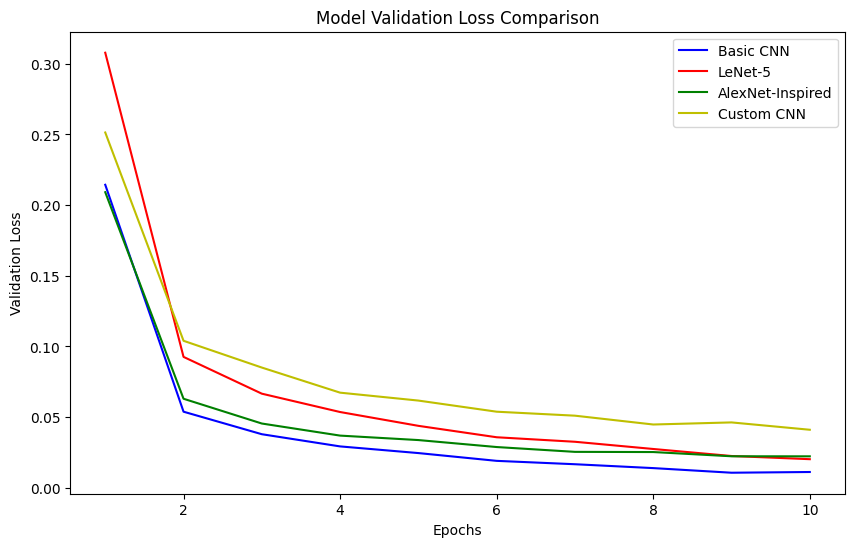

In [36]:
# Plot validation losses
plt.figure(figsize=(10, 6))
plt.plot(epochs, basic_loss, 'b-', label='Basic CNN')
plt.plot(epochs, lenet_loss, 'r-', label='LeNet-5')
plt.plot(epochs, alexnet_loss, 'g-', label='AlexNet-Inspired')
plt.plot(epochs, custom_loss, 'y-', label='Custom CNN')
plt.title('Model Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()
